In [1]:
import pandas as pd
import numpy as npb
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pickle

In [4]:
data = pd.read_csv('dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
data = data.dropna()
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [7]:
data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [8]:
data['popularity_flag'] = 0
data.loc[data['popularity'] > 40, 'popularity_flag'] = 1

In [9]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_flag
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


In [10]:
correlation_matrix = data.corr()
print(correlation_matrix)

                  Unnamed: 0  popularity  duration_ms  explicit  danceability  \
Unnamed: 0          1.000000    0.032146    -0.032738 -0.054735      0.003445   
popularity          0.032146    1.000000    -0.007129  0.044078      0.035444   
duration_ms        -0.032738   -0.007129     1.000000 -0.065270     -0.073435   
explicit           -0.054735    0.044078    -0.065270  1.000000      0.122506   
danceability        0.003445    0.035444    -0.073435  0.122506      1.000000   
energy             -0.055993    0.001053     0.058520  0.096954      0.134325   
key                -0.005521   -0.003847     0.008123  0.004485      0.036470   
loudness           -0.027307    0.050420    -0.003475  0.108587      0.259076   
mode                0.005110   -0.013948    -0.035581 -0.037216     -0.069224   
speechiness        -0.084952   -0.044930    -0.062605  0.307951      0.108625   
acousticness        0.076837   -0.025458    -0.103770 -0.094400     -0.171531   
instrumentalness   -0.070285

<ipython-input-10-e02734b85495>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


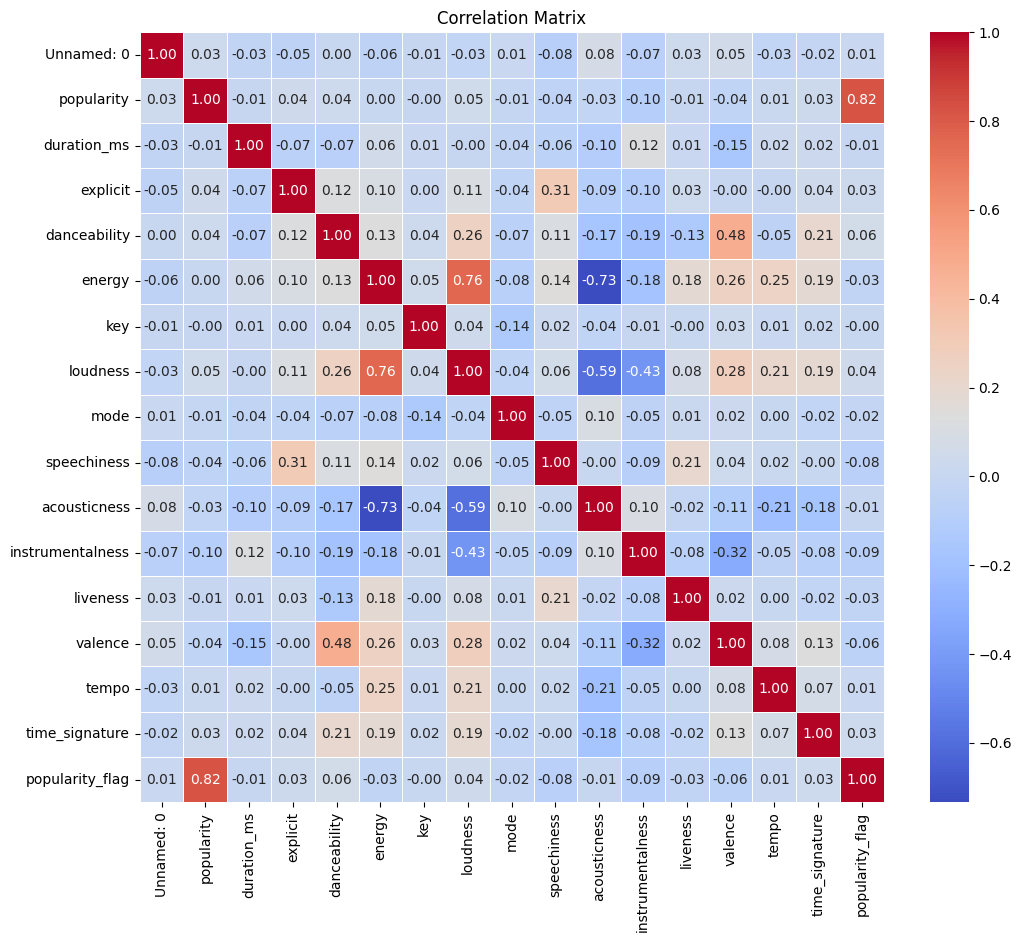

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data_art = data.groupby(['artists']).size()
data_art = data_art.to_frame()
data_art.sort_values(by=[0], ascending=False)

,0
artists,
my little airport,171
Glee Cast,139
Håkan Hellström,132
The Beatles,127
CoComelon,122
...,...
Jorge Drexler;Sebastián Prada,1
Jorrgus,1
Jorrgus & Crump,1


In [ ]:
data_gen = data.groupby(['track_genre']).size()
data_gen = data_gen.to_frame()
data_gen.sort_values(by=[0], ascending=False)

,0
track_genre,
acoustic,1000
electro,1000
deep-house,1000
detroit-techno,1000
disco,1000
disney,1000
drum-and-bass,1000
dub,1000
dubstep,1000


In [ ]:
data_art.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14407 entries, "Puppy Dog Pals" Cast to 黃敏華
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       14407 non-null  int64
dtypes: int64(1)
memory usage: 225.1+ KB


In [ ]:
data2 = data.drop(['Unnamed: 0', 'track_id','artists','album_name','track_name','popularity','track_genre'], axis=1)

In [ ]:
pop_corr = data2[data2.columns[1:]].corr()['popularity_flag'][:-1]

In [ ]:
ts_list = pop_corr.values.tolist()

In [ ]:
ts_list_abs =  [abs(ele) for ele in ts_list]

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

average = Average(ts_list_abs)
average

0.04962706430373703

In [ ]:
pop_corr_df = pop_corr.to_frame()

In [ ]:
pop_corr_df['pop_flag_abs'] = abs(pop_corr_df['popularity_flag'])
pop_corr_df_desc = pop_corr_df.sort_values(by=['pop_flag_abs'], ascending=False)
pop_corr_df_desc

,popularity_flag,pop_flag_abs
instrumentalness,-0.111037,0.111037
speechiness,-0.102336,0.102336
valence,-0.094728,0.094728
liveness,-0.070884,0.070884
energy,-0.067080,0.067080
loudness,0.062169,0.062169
time_signature,0.033201,0.033201
danceability,0.027011,0.027011
mode,-0.025064,0.025064
explicit,0.023499,0.023499


In [ ]:
pop_corr_abv = pop_corr_df[(4*pop_corr_df['pop_flag_abs']>3*average)]
pop_corr_abv = pop_corr_abv.sort_values(by=['pop_flag_abs'], ascending=False)
pop_corr_abv

,popularity_flag,pop_flag_abs
instrumentalness,-0.111037,0.111037
speechiness,-0.102336,0.102336
valence,-0.094728,0.094728
liveness,-0.070884,0.070884
energy,-0.067080,0.067080
loudness,0.062169,0.062169


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41790 entries, 0 to 41789
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       41790 non-null  int64  
 1   explicit          41790 non-null  bool   
 2   danceability      41790 non-null  float64
 3   energy            41790 non-null  float64
 4   key               41790 non-null  int64  
 5   loudness          41790 non-null  float64
 6   mode              41790 non-null  int64  
 7   speechiness       41790 non-null  float64
 8   acousticness      41790 non-null  float64
 9   instrumentalness  41790 non-null  float64
 10  liveness          41790 non-null  float64
 11  valence           41790 non-null  float64
 12  tempo             41790 non-null  float64
 13  time_signature    41790 non-null  float64
 14  popularity_flag   41790 non-null  int64  
dtypes: bool(1), float64(10), int64(4)
memory usage: 4.8 MB


In [ ]:
dummies_var = ["explicit","track_genre"]
data3 = data.drop(['Unnamed: 0', 'track_id','artists','album_name','track_name','popularity'], axis=1)
data3 = pd.get_dummies(data3, prefix=dummies_var, columns=dummies_var, drop_first=True )
data3.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,...,0,0,0,0,0,0,0,0,0,0
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,...,0,0,0,0,0,0,0,0,0,0
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,...,0,0,0,0,0,0,0,0,0,0
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,...,0,0,0,0,0,0,0,0,0,0
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data3.drop(['popularity_flag'],axis=1)
y = data3['popularity_flag']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=12345)
X_train.shape, X_test.shape

((35521, 55), (6269, 55))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}


dt = DecisionTreeClassifier(random_state=1234)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)


Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


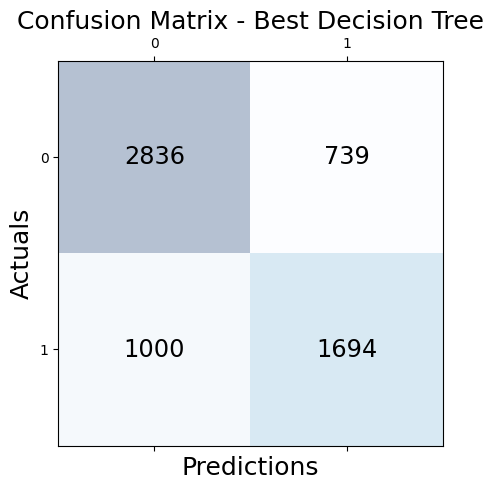


Best Decision Tree Model Metrics:
Accuracy:  0.722603286010528
Precision:  0.6962597616111796
Recall:  0.6288047512991833


In [ ]:
best_dt = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=1234)
best_dt.fit(X_train, y_train)

y_train_pred_best_dt = best_dt.predict(X_train)
y_test_pred_best_dt = best_dt.predict(X_test)

conf_matrix_best_dt = confusion_matrix(y_true=y_test, y_pred=y_test_pred_best_dt)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_best_dt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix_best_dt.shape[0]):
    for j in range(conf_matrix_best_dt.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix_best_dt[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Best Decision Tree', fontsize=18)
plt.show()

print("\nBest Decision Tree Model Metrics:")
print("Accuracy: ", accuracy_score(y_test, y_test_pred_best_dt))
print("Precision: ", precision_score(y_test, y_test_pred_best_dt))
print("Recall: ", recall_score(y_test, y_test_pred_best_dt))


In [ ]:
dt = DecisionTreeClassifier(random_state=1234)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

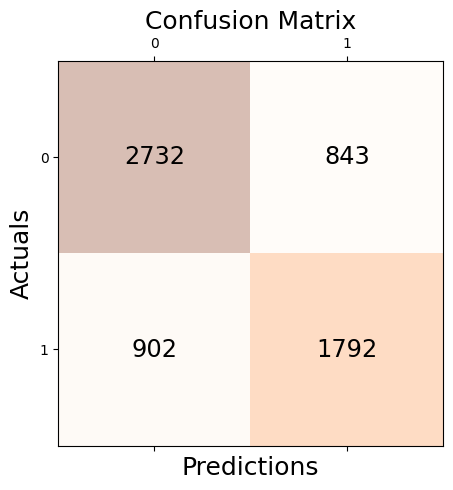

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

y_train_preddt = dt.predict(X_train)
y_test_preddt = dt.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_preddt)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
conf_matrix

array([[2732,  843],
       [ 902, 1792]])

In [ ]:
print("Decision Tree Model Metrics:")
print("Accuracy: ", (conf_matrix[0,0]+conf_matrix[1,1])/(conf_matrix[0,0]+conf_matrix[1,1]+conf_matrix[0,1]+conf_matrix[1,0]) )
print("Precision: ", (conf_matrix[0,0])/(conf_matrix[0,0]+conf_matrix[0,1]) )
print("Recall: ", (conf_matrix[0,0])/(conf_matrix[0,0]+conf_matrix[1,0]) )

Decision Tree Model Metrics:
Accuracy:  0.7216461955654809
Precision:  0.7641958041958042
Recall:  0.75178866263071


In [ ]:
data_pop_flag_group = data.groupby(['popularity_flag']).size()
data_pop_flag_group = data_pop_flag_group.to_frame()
data_pop_flag_group.sort_values(by=[0], ascending=False)

,0
popularity_flag,
0,23995
1,17795


In [ ]:
data_genre_groups = data.groupby(['track_genre'])['popularity_flag'].sum()
data_genre_groups = data_genre_groups.to_frame()
data_genre_groups.sort_values(by=['popularity_flag'], ascending=False)

,popularity_flag
track_genre,
brazil,964
chill,914
anime,807
deep-house,756
ambient,737
dubstep,692
emo,678
british,662
electronic,639


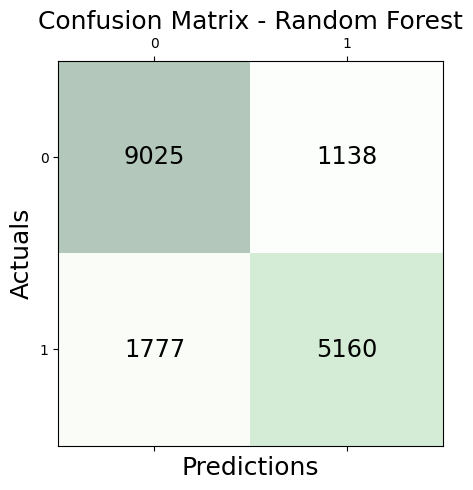


Random Forest Model Metrics:
Accuracy:  0.82953216374269
Precision:  0.8193077167354715
Recall:  0.7438373936860314


In [ ]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)

y_train_predrf = rf.predict(X_train)
y_test_predrf = rf.predict(X_test)

conf_matrix_rf = confusion_matrix(y_true=y_test, y_pred=y_test_predrf)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_rf, cmap=plt.cm.Greens, alpha=0.3)
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix_rf[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Random Forest', fontsize=18)
plt.show()

print("\nRandom Forest Model Metrics:")
print("Accuracy: ", accuracy_score(y_test, y_test_predrf))
print("Precision: ", precision_score(y_test, y_test_predrf))
print("Recall: ", recall_score(y_test, y_test_predrf))

In [ ]:
with open('BDM_Model.pkl','wb') as f:
    pickle.dump(rf, f)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

xgb = XGBClassifier(random_state=1234)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_xgb = XGBClassifier(**grid_search.best_params_, random_state=1234)
best_xgb.fit(X_train, y_train)

y_test_pred_best_xgb = best_xgb.predict(X_test)

print("\nImproved XGBoost Model Metrics:")
print("Accuracy: ", accuracy_score(y_test, y_test_pred_best_xgb))
print("Precision: ", precision_score(y_test, y_test_pred_best_xgb))
print("Recall: ", recall_score(y_test, y_test_pred_best_xgb))

Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}

Improved XGBoost Model Metrics:
Accuracy:  0.7800584795321638
Precision:  0.7485133020344288
Recall:  0.6894911344961799
